
# <center> <font color='#8A0829'> Sentiment analyser for OOREDOO Tunisia</font> </center>



 ## <font color='#B43104'> Context of the project</font>


- This project consists of an implementation of a sentiment analyzer for the phone operator OOREDOO Tunisia using social media comments written in Tunisian Arabic.


## <font color='#B43104'> Import necessary libraries</font>

In [317]:
## Import entire libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#so that plots appear in the same browser window
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## <font color='#B43104'> Data Preparation </font>

- The data we used is a collection of 341 comments, collected from Ooredoo Facebook official page and Tweets that contain #ooredootn. 


In [318]:
#Loading data from the csv file
df0 = pd.read_csv('ooredoodata.csv')

In [344]:

for i in df0['message']:
     i=i.replace('?', '')
     i=i.replace('!', '')
     i= i.lower()
     df0['message'].replace(i)
     #print(i) 
   
  

- we have 2 sentiment categories: positive and negative

In [321]:
from collections import Counter
counter = Counter(df0['category']).most_common()
print(len(counter))

2


- this graph shows the distribution of the positive and negative comments in the collected data

<Container object of 2 artists>

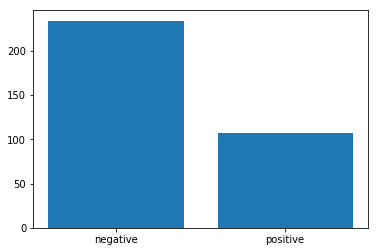

In [322]:
gR = df0.groupby('category').size()

plt.bar(gR.index, gR)

## <font color='#B43104'> Split data into train and test sets </font>

In [323]:
?train_test_split

In [324]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df0['message'], 
                                                    df0['category'], 
                                                    random_state=591)

In [325]:
print(X_train.shape)
print(X_test.shape)


(255,)
(86,)


- we will build a sentiment analayser using  different document representation and classification techniques.

## <font color='#B43104'>1. Sentiment analysis based on BOW model with word occurrences</font>

## <font color='#B43104'>Feature extraction</font>

- *Feature extraction* means representing raw text documents as numerical *feature vectors*.
- In the simple BOW model, feature vector = number of word occurrences for each document and each vocabulary word.
- We will do this using the ``CountVectorizer`` class: first we'll **tokenize** the documents and extract the vocabulary set, and then we determine the feature vectors.

## <font color='#B43104'> Tokenize documents and build vocabulary set</font>

- Fit the CountVectorizer to the training data

In [326]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### <font color='#B43104'> Construction of document-term matrix </font>
- This matrix contains the *feature vectors* of a given set of raw documents.
- For the simple BOW model, feature vector = number of word occurrences.

In [327]:
# the document-term matrix for the training corpus
X_train_vectorized = vect.transform(X_train)

print(X_train_vectorized.shape)

# the document-term matrix for the test corpus
X_test_vectorized = vect.transform(X_test)

print(X_test_vectorized.shape)

(255, 1289)
(86, 1289)


## <font color='#B43104'> Build classification model using Logistic Regression </font>
We are going to  to build a classification model using the feature vectors of the training documents (which are stored in the variable ``X_train_vectorized``) and their corresponding true sentiment categories (which are stored in the variable ``y_train``).

In [328]:
# Train the model using LR method
LR_model = LogisticRegression()
LR_model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## <font color='#B43104'> Test the classification model </font>
We'll use the obtained LR model to predict sentiment categories (classes) of test documents.

In [329]:
# Use this model to predict the sentiment category of test documents
LR_predictions = LR_model.predict(X_test_vectorized)


those some exemples of the predictions for the first 10 test documents

In [330]:
print(LR_predictions[:10])
print(np.array(X_test[:10]))

['negative' 'positive' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative']
[ 'Chère Ooredoo sabit jom3a hethi 3 cartes w mjani 7ata bonus donc demain nchouf a9reb boutique sinon na7i ligne car je suis en colère'
 'in7eb ooredoo Wa ana zaboun wafi lah Wa piisati klha ooredoo walhi n7eki bl7ek wanchlh narb7'
 'Ouuh amsat pub ritha f 7yatii ????'
 'Ooredoo Tunisie  Community manager mta3kom berjoulia yestahil Bonus fil chahria wel equipe kamla !'
 'Berabi a3touni na hale rani ne9ouse meta3 chehar fi neharine te9ouse meta3 jeme3 nehar a3touni fekera berabi'
 'oouh 3al connexion' 'Ena vraiment publicité ma3jbnich ????'
 "Service techniques  zero  3andi presque 2 mois w Ena na3mel f des  réclamations  concernant  ligne mta3i matab3athech  des messages w chay service zerooooo jusqu'à  maintenant  mafama  7ata résultat!!"
 'kol 3am w ooredoo fl 3alali '
 '125 Mo ! Zaaaa7 rana fi 2017 rahou mch 1997.... Tadh7kou 3al 3bed... A3mlou 1 Go b 0.900 taw ness lkol

### <font color='#B43104'> Evaluate performance of classification model </font>

In [331]:
LR_classif_rate = accuracy_score(y_test, LR_predictions)
LR_classif_rate

0.77906976744186052

### <font color='#B43104'>  Interpretation of model's coefficients (parameters)</font>
Which vocabulary words are most important in our classification model?

In [332]:
# Display the 10 smallest and 10 largest coefficients


feature_names = np.array(vect.get_feature_names())

print('Smallest Coefs of LR model:\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

print('Largest Coefs of LR model:\n')
print(' Coefficient values: \n{}'.format(coefs[sorted_coef_index[:-11:-1]]))
print(' Feature names: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

print('Smallest abs(Coefs):\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index_2[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index_2[:10]]))

Smallest Coefs of LR model:

 Coefficient values:
[-0.76013548 -0.67214242 -0.67180336 -0.65640947 -0.65303264 -0.6512088
 -0.64966107 -0.59014885 -0.58154002 -0.54518596]

 Feature names:
['sor3a' 'yabdou' 'ma3ndich' 'breseau' '3enk' 'kifech' 'wamiya' '4achach'
 'fi' 'man7ebch']

Largest Coefs of LR model:

 Coefficient values: 
[ 1.46563069  0.91607536  0.80236102  0.771239    0.72802291  0.72802291
  0.72032129  0.69000152  0.67240607  0.65082873]
 Feature names: 
['oredoo' 'bil' 'mafara7to' 'bugs' 'oridoo' 'modem' 'page' 'chouti'
 'partagée' 'fidele']
Smallest abs(Coefs):

 Coefficient values:
[ -5.37551997e-07  -6.34311357e-05  -3.42090049e-03  -7.06375012e-03
  -7.34932721e-03  -8.26432590e-03  -8.26432590e-03  -8.26432590e-03
  -8.26432590e-03  -8.26432590e-03]

 Feature names:
['tlf' 'alch' 'aman' 'orange' 'kemel' 'athaaaaaaammlmkkkllll' 'atwo'
 'ezhar' 'ra8m' 'ba3id']



## <font color='#B43104'> Build classification model using Naive Bayes</font>

Build Naive Bayes classification model

In [333]:
NB_model = MultinomialNB()
NB_model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

 predict sentiment of test documents

In [334]:
NB_predictions = NB_model.predict(X_test_vectorized)

calculate model's classification rate 

In [335]:
NB_classif_rate = accuracy_score(y_test, NB_predictions)
NB_classif_rate

0.76744186046511631

## <font color='#B43104'> 2.  Sentiment analysis using BOW model and Tfidf</font>
We are basically going to re-do the same steps as above, but using the ``TfidfVectorizer`` class instead of ``CountVectorizer`` class.

- we Build vocabulary and then we fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5

In [336]:
tfidf_vect = TfidfVectorizer(min_df=5)
tfidf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

- we Build document-term matrices: X_train_vectorized_2 and X_test_vectorized_2

In [337]:
X_train_vectorized_2 = tfidf_vect.transform(X_train)
X_test_vectorized_2 = tfidf_vect.transform(X_test)

-Now we build the classifier

In [338]:
LR_model_2 = LogisticRegression()
LR_model_2.fit(X_train_vectorized_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- we calculate the classification rate

In [339]:
## Evaluate the classifier, i.e. calculate its classification rate

LR_predictions_2 = LR_model_2.predict(X_test_vectorized_2)
accuracy_score(y_test, LR_predictions_2)

0.79069767441860461

- we search for the most significant vocabulary words according to their max tfidf feature value

In [340]:
sorted_tfidf_index = X_train_vectorized_2.max(0).toarray()[0].argsort()
print('Vocabulary words sorted by tfidf feature value:')
print('  Smallest:\n{}\n'.format(tfidf_feature_names[sorted_tfidf_index[:10]]))
print('  Largest: \n{}'.format(tfidf_feature_names[sorted_tfidf_index[:-11:-1]]))

Vocabulary words sorted by tfidf feature value:
  Smallest:
['ou' 'année' 'ti' 'dinar' 'bonus' 'n7eb' 'flous' 'solde' 'ken' 'ena']

  Largest: 
['ya' 'el' 'les' 'la' 'kol' 'internet' 'fil' 'fi' 'dima' 'mala']


- we search for the most significant vocabulary words according to their LR model coefficient value

In [341]:
sorted_coef2_index = LR_model_2.coef_[0].argsort()
print('Vocabulary words sorted by LR model coefficient value:')
print('  Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('  Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Vocabulary words sorted by LR model coefficient value:
  Smallest Coefs:
['sor3a' 'yabdou' 'ma3ndich' 'breseau' '3enk' 'kifech' 'wamiya' '4achach'
 'fi' 'man7ebch']

  Largest Coefs: 
['oredoo' 'bil' 'mafara7to' 'bugs' 'oridoo' 'modem' 'page' 'chouti'
 'partagée' 'fidele']
